<a href="https://colab.research.google.com/github/sim-mautner/cs1010-21t3/blob/main/lectures/03-python-and-programming-fundamentals/05-modules-and-libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Topic 3<br>
> Python and Programming Fundamentals<br>
> COMP1010 2021 T3<br>
> Week 1-3

> Topic 3.5<br>
> Modules and Libraries

# Modules and Libraries



Why do we have them?

Where can I find more? [PyPI - Python Package Index](https://pypi.org/)

## 1 - Datetime

This section also includes a lot of subtleties about passing parameters into functions.

Can we get the current datetime?


In [4]:
import datetime

today = datetime.datetime.now()
print(today)


2021-10-01 04:28:55.728918


Can we create an object with a specific datetime?

In [6]:
other_date = datetime.datetime(2020, 4, 17)
print(other_date)

2020-04-17 00:00:00


Can we print out the current date and time, in the format:

> Today is Wednesday, 30/04/2021

Some useful/common formats:
* %a	Weekday, short version	Wed	
* %A	Weekday, full version	Wednesday		
* %d	Day of month 01-31	31	
* %b	Month name, short version	Dec	
* %B	Month name, full version	December	
* %m	Month as a number 01-12	12	
* %y	Year, short version, without century	18	
* %Y	Year, full version	2018	
* %H	Hour 00-23	17	
* %I	Hour 00-12	05	
* %p	AM/PM	PM	
* %M	Minute 00-59	41	
* %S	Second 00-59	08

([complete list of formats](https://www.w3schools.com/python/python_datetime.asp))

In [7]:
print(f"Today is {today.strftime('%A, %d/%m/%Y')}.")

Today is Friday, 01/10/2021.


As well as `datetime`, there is `date` and `time` if we are only storing the date part or the time part and we don't need the two together.

Can we find the difference between 2 dates?

In [9]:
d1 = datetime.date(2021, 10, 16)
d2 = datetime.date(2021, 10, 21)
# Time span is the time between two dates/times/datetimes.
print(d2-d1)

5 days, 0:00:00


A timedelta object represents a duration, the difference between two dates or times.

`datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)`

Can we find the date 10 days after a given date?

In [10]:
# Use d1 from above
ten_days = datetime.timedelta(10)
print(d1+ten_days)

2021-10-26


And 5 mintues later?


**Useful Notes**

There are 2 ways we can create a `timedelta` object for 5 minutes:
* `timedelta(0,0,0,0,5)`
* `timedelta(minutes=5)`

The latter is more readable and concise.

We can combine a `date` object with a `time` object into a `datetime` object.

We can create an empty (zeroed) time object using `time()`


In [13]:
five_minutes = datetime.timedelta(minutes=5)
print(d1)
d3 = datetime.datetime.combine(d1,datetime.time())
print(d3)
d3_plus_5_mins = d3+five_minutes
print(d3_plus_5_mins)

2021-10-16
2021-10-16 00:00:00
2021-10-16 00:05:00


Can we convert it into a string (to save it into a dictionary or file)?

In [14]:
format = "%d%m%y%H%M%S"
print(type(d1))
d1_string = d1.strftime(format)
print(d1_string)

<class 'datetime.date'>
161021000000


Can we convert it back from a string into a datetime object?

In [16]:
d4 = datetime.datetime.strptime(d1_string, format)
print(d4)

2021-10-16 00:00:00


For further information, specifically managing different timezones: https://docs.python.org/3/library/datetime.html

## 2 - Random



* `random.randint(start, stop)` (start and stop are both included in the range)
* `random.choices(sequence, weights=None, cum_weights=None, k=1)`

Write a function which simulates the rolling of a 6-sided dice.

In [ ]:
import random

def roll_n6():
    return random.randint(1,6)

for i in range(1,35):
    print(roll_n6())

Writie a function which takes in an integer n, and simulates the rolling of an n-sided dice.

In [ ]:
import random

def roll_nDie(num_sides):
    return random.randint(1,num_sides)

for i in range(1,35):
    print(roll_nDie(42))

Is it possible to flip a weighted coin?

Imagine we have a coin, in which there is 1/3 chance you'll get 'heads' and 2/3 chance you'll get 'tails'.

In [31]:
def flip_weighted_coin():
    options = ['H','T']
    weights = [ 1,  2 ] # for every one heads, I want 2 tails
    return random.choices(options, weights)

print(flip_weighted_coin())

['T']


Can we do this 12 times a get a list of the results?

In [32]:
def flip_weighted_coin():
    options = ['H','T']
    weights = [ 1,  2 ] # for every one heads, I want 2 tails
    return random.choices(options, weights, k=12)

print(flip_weighted_coin())

['T', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']


## 3 - Images

Important info:
* An image is a width x height grid of pixels
* Each pixel has a Red, Green, and Blue component

Using the [Pillow](https://python-pillow.org/) library in python allows us to create and manipulate images.

**Note:** This is not something we will be covering in depth in this course, so don't feel you have to memorise how to manipulate images.

In [33]:
!pip install Pillow

In [ ]:
# import PIL
from PIL import Image

im = Image.new(mode="RGB", size=(800,600), color='white')

im

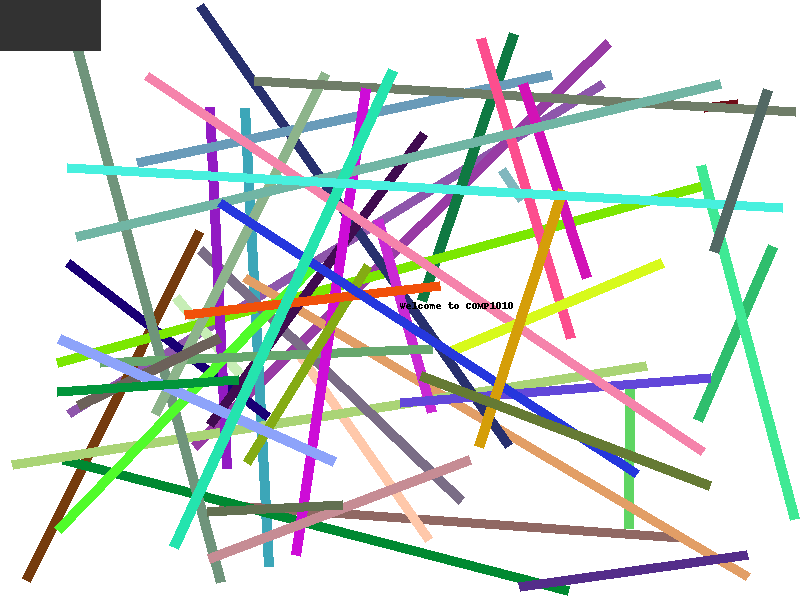

In [43]:
# Abstract art

from PIL import Image, ImageDraw

im = Image.new(mode="RGB", size=(800,600), color='white')

drawer = ImageDraw.Draw(im)

for i in range(50):
    start_x = random.randint(0,800)
    start_y = random.randint(0,600)
    end_x = random.randint(0,800)
    end_y = random.randint(0,600)
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    drawer.line((start_x, start_y, end_x, end_y), fill=(r,g,b), width=10)

drawer.text((400,300), "Welcome to COMP1010", fill="black")

drawer.rectangle((0,0,100,50), fill=(50,50,50))

im

## 4 - Pandas and Plotly (a detour into Musk tweets)

This code cell creates a list from some of Elon Musk's tweets. 

*You're not expected to completely understand this code yet. It's only here to give us interesting data*.

In [46]:
import pandas

raw_tweets = pandas.read_csv('https://raw.githubusercontent.com/sim-mautner/cs1010-21t3/main/data/elonmusk.csv')
elon_tweets = list(raw_tweets.tweet)

print(elon_tweets)

['Cute', 'Wow', 'Reusability is essential. A rocket that is single use is just as absurd as a single use airplane. F9 engines already fire 3 times per flight.', 'Wild times!', 'We’re being extra paranoid. Maximizing probability of successful launch is paramount.', 'Welcome anytime', 'Well, I do care very much about sustainability of civilization, but there is some truth to the irony part haha', 'Yes, in plan. Superchargers and public high power wall connectors will keep growing exponentially every year.', '👀', 'I think so', 'Doing range testing now. Number will be significantly higher than 300. Extremely good for any EV, especially an SUV.', 'We have reduced pricing on Model Y LR dual motor & will offer a LR single motor Y in a few months, which improves affordability, while still keeping the product excellent', 'Yes', 'It may be able to reach 250kW at low states of charge', 'No, as range would be unacceptably low (< 250 mile EPA)', 'We had to increase some wire thicknesses in S/X to r

How many tweets are there in our dataset?

In [47]:
print(len(elon_tweets))

9167


In what tweets has Elon Musk said "simulation"?

In [48]:
simulation_tweets = []
for tweet in elon_tweets:
    if 'simulation' in tweet:
        simulation_tweets.append(tweet)
    
print(simulation_tweets)

['Pretty much. We place high value on simulation too, but nothing’s as weird as reality!', 'Hope you’re enjoying the simulation', '8 years later, the simulation is mostly real', 'Root of energy to mass ratio is max render speed of the simulation', 'Physics is a set of compression functions for the simulation', 'Cramer is a simulation. He’s not real.', 'Uh it’s a simulation hello', 'Appears to be simulations all the way down', 'All parameters in a simulation are necessarily quantized', 'Yes, if there is no listener, a simulation probably wouldn’t spend computing power on sound', 'To conserve computing power, a simulation would only render an object when it is observed', 'Second best answer to the Fermi Paradox after the simulation argument', 'Falcon Heavy launch simulation almost ready. Will be set to Bowie’s Life on Mars.', 'The singularity for this level of the simulation is coming soon. I wonder what the levels above us look like. \n\nGood chance they are less interesting and deeper 

What emoji does Elon Musk use?

In [50]:
!pip install emoji
import emoji

elon_emoji = []
for tweet in elon_tweets:
    for character in tweet:
        if character in emoji.UNICODE_EMOJI_ALIAS_ENGLISH:
            elon_emoji.append(character)

print(elon_emoji)

['👀', '👀', '👀', '🔥', '🔥', '🖤', '✨', '✨', '🖤', '🤣', '🤣', '💕', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🇺', '🇸', '🇺', '🇸', '🇺', '🇸', '🇺', '🇸', '🤣', '🤣', '🤣', '🤣', '😂', '😂', '🤣', '🤣', '🤔', '💕', '🤣', '🤣', '🤣', '🤣', '♥', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '😢', '🤣', '🤣', '🤣', '🤣', '🐈', '😅', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '❤', '🤣', '🤣', '🎶', '🎶', '🤣', '😉', '😎', '🤣', '🤣', '🚀', '♥', '🤣', '🤣', '🖤', '🤣', '💕', '🤣', '🤣', '🤣', '🤣', '🌹', '👻', '🤣', '🤣', '♥', '🤣', '💕', '🤣', '🤣', '💕', '😀', '❤', '👍', '♥', '♥', '♥', '❤', '🤣', '🐝', '🐝', '🤣', '🤣', '🤣', '🤣', '🧚', '♀', '👸', '🤣', '🤣', '💕', '🔥', '🤣', '🤣', '🧲', '🤣', '🤣', '🥜', '🤣', '🤣', '🔥', '🤣', '🤣', '👆', '💯', '😅', '🥜', '🔥', '🔥', '🔥', '👍', '🤣', '🤣', '🤣', '🤣', '🤣', '👍', '🤣', '🤣', '😉', '🤣', '🤣', '🤓', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '🤣', '😀', '🤣', '🤣', '😅', '😀', '🐇', '💯', '🤣', '🤣', '😮', '🤣', '🤣', '🤣', '🤣', '❤', '🤣', '🤣', '👍', '😀', '🤔', '🤣', '🤣', '🤣', '🤣', '💖', '🤣', '🤣', '😀', '🤣', '🤣', '👍', '😀', '⚡', '✌', '🤣', '🤣', '🤔', '💕', '✌', '❤', '👀', '🤣', '🤣', '🔭', '❤', '🔥', '🔥', '😀',

Can we build a dictionary counting how often Elon Musk uses each Emoji?

In [55]:
emoji_count = {}

'''
smiley: 6
heart: 5
'''

for an_emoji in elon_emoji:
    # If it's already in our dictionary, add one to the count
    # Otherwise, add it to our dictionary with count = 1
    if an_emoji in emoji_count:
        emoji_count[an_emoji] += 1
    else:
        emoji_count[an_emoji] = 1
    
print(emoji_count)

{'👀': 4, '🔥': 34, '🖤': 50, '✨': 3, '🤣': 226, '💕': 20, '🇺': 6, '🇸': 10, '😂': 2, '🤔': 11, '♥': 124, '😢': 5, '🐈': 4, '😅': 8, '❤': 15, '🎶': 9, '😉': 28, '😎': 5, '🚀': 38, '🌹': 1, '👻': 5, '😀': 48, '👍': 18, '🐝': 9, '🧚': 3, '♀': 4, '👸': 1, '🧲': 2, '🥜': 7, '👆': 1, '💯': 4, '🤓': 1, '🐇': 4, '😮': 2, '💖': 4, '⚡': 5, '✌': 6, '🔭': 2, '😊': 3, '💘': 3, '🤹': 1, '🏻': 2, '♂': 7, '🕺': 1, '☃': 1, '\U0001fa91': 1, '🍻': 1, '🌏': 4, '💨': 15, '😞': 1, '👶': 1, '🚘': 17, '☀': 1, '🎥': 2, '🧱': 1, '🐌': 4, '🎄': 3, '🎁': 3, '☺': 5, '🐼': 1, '🤞': 1, '⚔': 2, '🧝': 2, '🇩': 3, '🇪': 4, '💛': 7, '😘': 2, '🎃': 1, '🥇': 1, '™': 3, '🍟': 1, '😈': 1, '🧠': 7, '🕳': 1, '🎤': 1, '🦌': 1, '🦶': 1, '🐐': 2, '💩': 5, '👁': 1, '🥧': 2, '💣': 1, '💦': 1, '🇮': 8, '🥳': 3, '😲': 3, '🤗': 10, '🇳': 10, '🇴': 8, '🇱': 2, '🍀': 4, '😋': 3, '🧐': 1, '👌': 6, '🎩': 2, '🤝': 1, '🐏': 3, '🍷': 1, '👽': 9, '🤖': 3, '🧙': 4, '🦆': 4, '💰': 1, '😇': 2, '🐣': 1, '🧨': 1, '⬇': 1, '🌌': 2, '😐': 1, '🏴': 1, '☠': 1, '😔': 3, '🇫': 2, '💙': 4, '🍭': 2, '🙏': 3, '😜': 4, '🍁': 1, '🍃': 3, '🍂': 1, '🇯': 2, '🇵':

Can we plot it?

In [52]:
!pip install plotly
import plotly.express

plotly.express.bar(x=list(emoji_count.keys()), y=list(emoji_count.values()))

What about only the most frequently used ones?

In [53]:
frequent_emojis = {}

for an_emoji in emoji_count:
    if emoji_count[an_emoji] > 10:
        frequent_emojis[an_emoji] = emoji_count[an_emoji]

plotly.express.bar(x=list(frequent_emojis.keys()), y=list(frequent_emojis.values()))

# Feedback (Topic 3.5)

[https://forms.gle/Uod5Jpr7AJ2z7cHLA](https://forms.gle/Uod5Jpr7AJ2z7cHLA)

![](https://i.imgur.com/0L50D4L.png)